In [ ]:
# import neccessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

Load the dataset


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:

X_train.shape

(50000, 32, 32, 3)

# shape of train and test file

In [ ]:
X_train.shape

(50000, 32, 32, 3)

Each image is 32px by 32px and each pixel contains 3 dimensions (R, G, B). Each value is the brightness of the corresponding color between 0 and 255.

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

50000 training images and 1000 test images


In [ ]:
y_train.shape

(50000, 1)

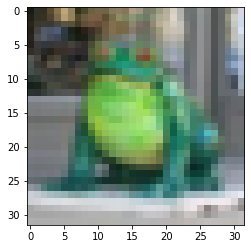

In [ ]:
plt.imshow(X_train[19])

In [ ]:
y_train1D=y_train.reshape(-1,)

In [ ]:
y_train1D.shape

(50000,)

In [ ]:
y_train1D

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

There are 10 classes in this datasets


In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

let define a function to study and plot the respective index image

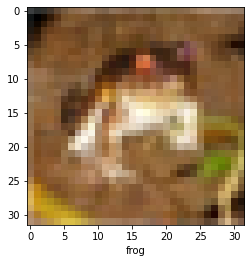

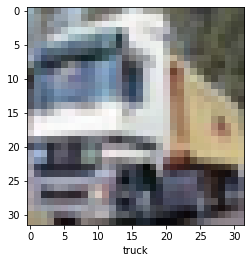

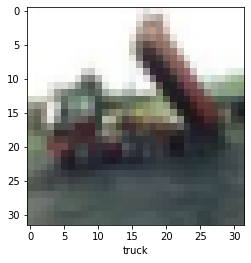

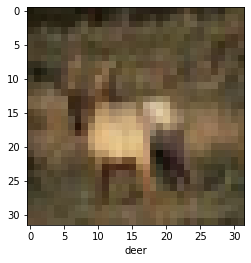

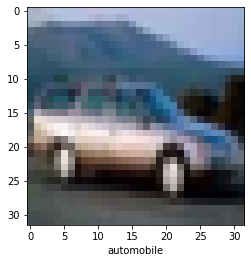

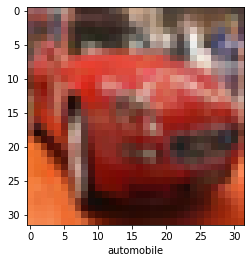

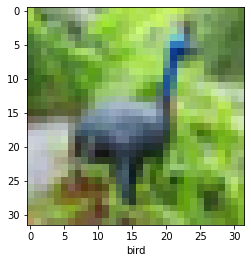

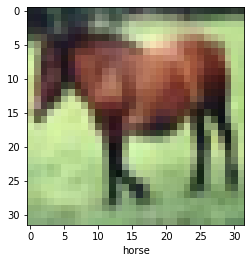

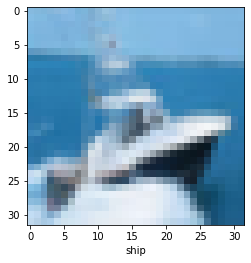

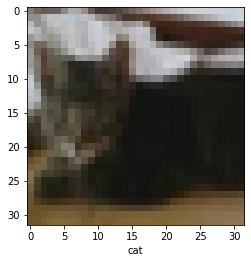

In [ ]:
def img_plot(X,y,index):
  plt.figure(figsize=(8,4))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])
for i in range(10):
     img_plot(X_train,y_train1D,i)

Normalize datasets for better perfromance.

 Rescale the images to obtain the range [0, 1] by dividing by 255 (the maximum value of the pixels).

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(3000, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30010     
Total params: 9,249,010
Trainable params: 9,249,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
mlp = model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 105s 67ms/step - loss: 2.3676 - accuracy: 0.2814
Epoch 2/6
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6923 - accuracy: 0.3917
Epoch 3/6
1563/1563 [==============================] - 104s 66ms/step - loss: 1.6051 - accuracy: 0.4292
Epoch 4/6
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5589 - accuracy: 0.4427
Epoch 5/6
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5347 - accuracy: 0.4568
Epoch 6/6
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4897 - accuracy: 0.4715


In [ ]:
hist=mlp.history

In [ ]:
#accuracy of the model
print("Accuracy of the MLP model in each epoch is :",hist['accuracy'])
print("loss of the MLP model in eah epoch is :",hist['loss'])
print("final accuracy of the MLP model: ",round((hist['accuracy'][-1]),2)*100 )

Accuracy of the MLP model in each epoch is : [0.32561999559402466, 0.40049999952316284, 0.43195998668670654, 0.4471200108528137, 0.4602000117301941, 0.4700399935245514]
loss of the MLP model in eah epoch is : [1.9376896619796753, 1.6777042150497437, 1.5984357595443726, 1.5532768964767456, 1.526780605316162, 1.4956066608428955]
final accuracy of the MLP model:  47.0


model.evaluate(): To calculate the loss values for input data.

model.predict(): To generate network output for input data.

model.predict_classes(): To generate class outputs for input data.

model.predict_proba(): To generate class probabilities for input data.

Evaluation:

In [ ]:
mlp
#mlp_score = hist.predict(X_test)
#print('\n', 'Test accuracy:', mlp_score)

ANN for classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.9289 - accuracy: 0.3079
Epoch 2/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6457 - accuracy: 0.4171
Epoch 3/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.5582 - accuracy: 0.4475
Epoch 4/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4892 - accuracy: 0.4747
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4340 - accuracy: 0.4973


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_per_class=[np.argmax(a) for a in y_pred]
print("classification report: ",classification_report(y_test,y_pred_per_class))

classification report:                precision    recall  f1-score   support

           0       0.66      0.38      0.48      1000
           1       0.68      0.49      0.57      1000
           2       0.45      0.16      0.23      1000
           3       0.38      0.17      0.23      1000
           4       0.44      0.30      0.35      1000
           5       0.31      0.48      0.38      1000
           6       0.29      0.87      0.43      1000
           7       0.65      0.41      0.50      1000
           8       0.51      0.70      0.59      1000
           9       0.66      0.44      0.52      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



Convolutional Neural Network

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7019 - accuracy: 0.3813
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1530 - accuracy: 0.6025
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0166 - accuracy: 0.6451
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9266 - accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8623 - accuracy: 0.7026
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8103 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7589 - accuracy: 0.7393
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7250 - accuracy: 0.7517
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6803 - accuracy: 0.7604
Epoch 10/10
1563/1563 [==============================] - 59s 37m

In [ ]:
y_pred_cnn=cnn.predict(X_test)
y_pred_cnn

array([[3.42429645e-04, 1.03131060e-05, 8.34268169e-04, ...,
        4.98834124e-05, 1.39485439e-02, 1.00482917e-04],
       [5.06121141e-04, 9.46519151e-03, 2.69542284e-06, ...,
        2.65064450e-08, 9.90020394e-01, 5.37292044e-06],
       [6.92265481e-02, 3.83997768e-01, 5.20137651e-03, ...,
        1.28164701e-03, 2.13290289e-01, 3.16525221e-01],
       ...,
       [2.86991289e-03, 9.63837124e-07, 7.66251087e-02, ...,
        3.97423297e-01, 1.12115005e-04, 2.60805496e-06],
       [1.71243493e-02, 9.96952802e-02, 8.36709747e-04, ...,
        5.13306004e-04, 2.10079248e-03, 5.99050836e-04],
       [1.42386023e-04, 2.89297386e-05, 3.84740997e-04, ...,
        9.92311776e-01, 8.52834637e-06, 5.06488595e-06]], dtype=float32)

In [ ]:
y_pred_cnn_class=[np.argmax(b) for b in y_pred_cnn]
print("classification_report: ", classification_report(y_test,y_pred_cnn_class))

classification_report:                precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.81      0.80      0.80      1000
           2       0.60      0.59      0.59      1000
           3       0.49      0.54      0.51      1000
           4       0.57      0.69      0.63      1000
           5       0.61      0.62      0.61      1000
           6       0.81      0.69      0.75      1000
           7       0.80      0.72      0.75      1000
           8       0.75      0.86      0.80      1000
           9       0.85      0.70      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000

